In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path 
from PIL import Image

In [2]:
df = pd.read_csv("../data/Subset-Chexchonet/prototype.csv")
df.head()

,patient_id,cxr_filename,cxr_time_offset,cxr_year,cxr_path,cxr_pixel_spacing_x,cxr_pixel_spacing_y,age,sex,ivsd,lvpwd,lvidd,slvh,dlv,composite_slvh_dlv,heart_transplant,lung_transplant,pacemaker_or_icd
0,3105427188c354468161dcee4674e582,3105427188c354468161dcee4674e582_d65d3d0d.jpg,2217 days 19:08:31.529631,2016,./cxrs/3105427188c354468161dcee4674e582_d65d3d...,0.194556,0.194556,53,F,0.909898,0.860753,4.49881,0,0,0,0,0,0
1,c109b23c5bf9509c9b32b08cdfc97258,c109b23c5bf9509c9b32b08cdfc97258_ca94f50f.jpg,5687 days 07:14:52.132324,2017,./cxrs/c109b23c5bf9509c9b32b08cdfc97258_ca94f5...,0.194556,0.194556,80,M,1.248470,1.188050,7.41417,0,1,1,0,0,1
2,d718aeed79a31196b69b13c1fbbcbbc3,d718aeed79a31196b69b13c1fbbcbbc3_77d78f06.jpg,1289 days 02:05:54.042273,2013,./cxrs/d718aeed79a31196b69b13c1fbbcbbc3_77d78f...,0.194562,0.194562,49,F,0.858042,0.788228,4.61547,0,0,0,0,0,0
3,fe6d7bff4559f11afeedb3991b267c33,fe6d7bff4559f11afeedb3991b267c33_4a26d2f2.jpg,4696 days 17:11:06.077496,2018,./cxrs/fe6d7bff4559f11afeedb3991b267c33_4a26d2...,0.194556,0.194556,76,F,1.436670,1.322980,5.63164,1,1,1,0,0,1
4,5b4a36c2fb50d1aca37b07efdcde5cb8,5b4a36c2fb50d1aca37b07efdcde5cb8_1754ec2e.jpg,1866 days 03:22:07.167339,2014,./cxrs/5b4a36c2fb50d1aca37b07efdcde5cb8_1754ec...,0.194556,0.194556,63,F,1.275050,1.057580,4.54000,0,0,0,0,1,0


In [3]:
print("Unique patients:", df['cxr_filename'].nunique())
print("Total images:", len(df))

Unique patients: 2000
Total images: 2000


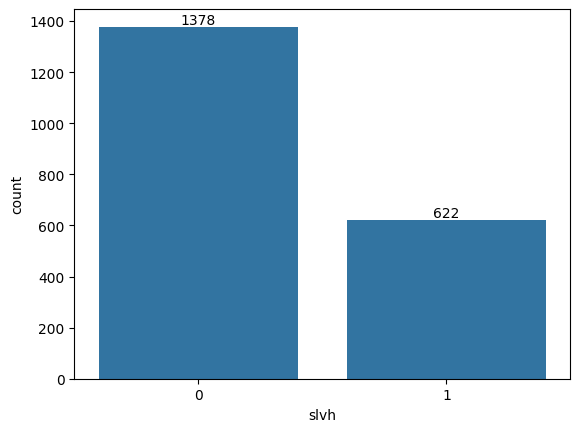

In [6]:
ax = sns.countplot(data=df, x='slvh')
ax.bar_label(ax.containers[0])
plt.show()

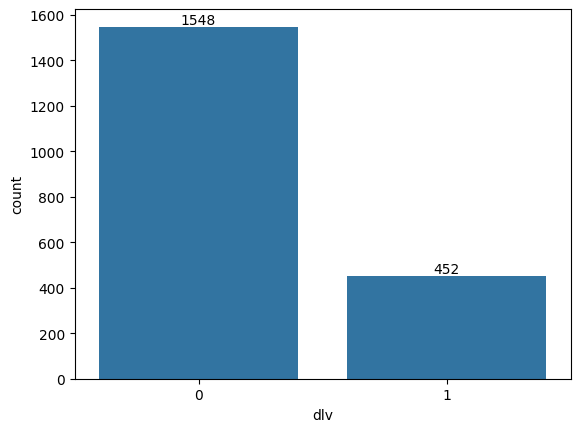

In [7]:
ax = sns.countplot(data=df, x='dlv')
ax.bar_label(ax.containers[0])
plt.show()

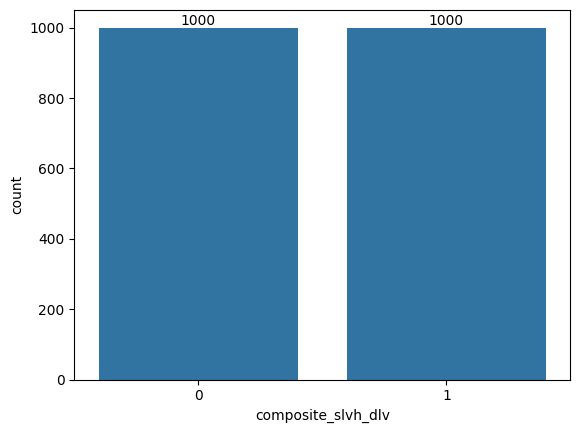

In [8]:
ax = sns.countplot(data=df, x='composite_slvh_dlv')
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
df['composite_slvh_dlv'].value_counts()


composite_slvh_dlv
0    1000
1    1000
Name: count, dtype: int64

In [12]:
img_path = df['cxr_filename'].iloc[0]
img = Image.open(Path("../data/Subset-Chexchonet/images/") / img_path)
print(img.size, img.mode)

(224, 224) L


In [14]:
df.isnull().sum()

patient_id             0
cxr_filename           0
cxr_time_offset        0
cxr_year               0
cxr_path               0
cxr_pixel_spacing_x    0
cxr_pixel_spacing_y    0
age                    0
sex                    0
ivsd                   0
lvpwd                  0
lvidd                  0
slvh                   0
dlv                    0
composite_slvh_dlv     0
heart_transplant       0
lung_transplant        0
pacemaker_or_icd       0
dtype: int64

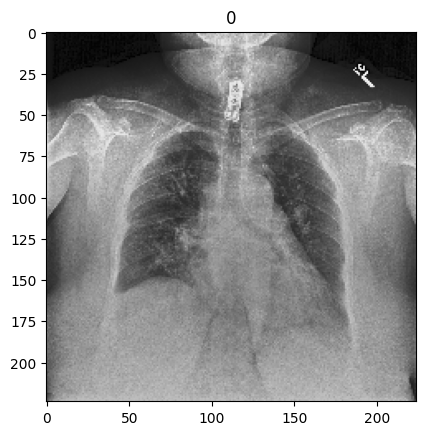

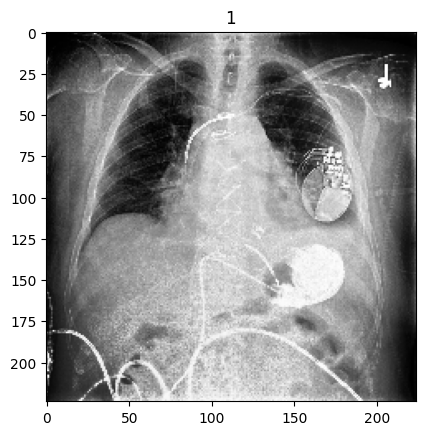

In [15]:
from matplotlib import pyplot as plt

for label in df['composite_slvh_dlv'].unique():
    sample_path = df[df['composite_slvh_dlv']==label]['cxr_filename'].iloc[0]
    img = Image.open(Path("../data/Subset-Chexchonet/images/") / sample_path)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.show()


<Axes: xlabel='composite_slvh_dlv', ylabel='age'>

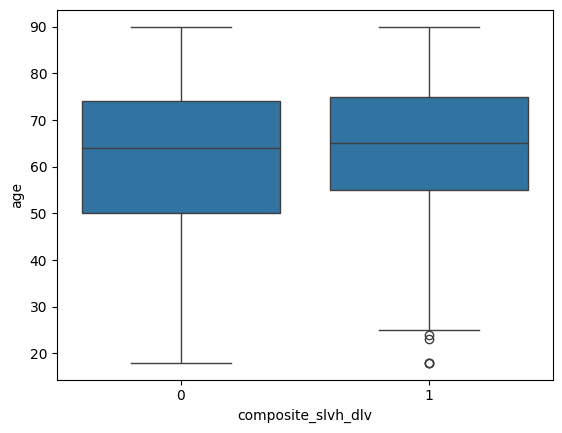

In [16]:
sns.boxplot(data=df, x='composite_slvh_dlv', y='age')


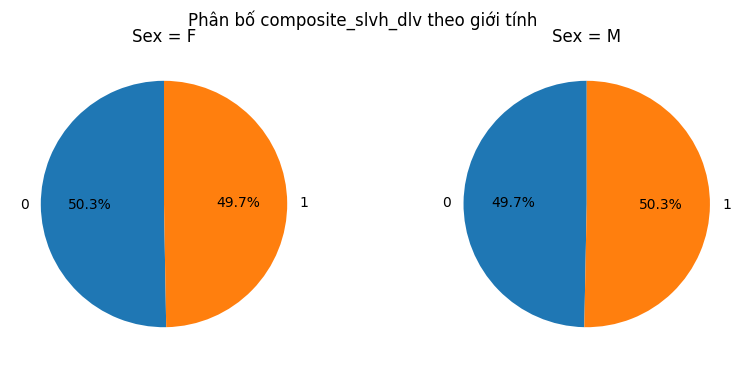

In [19]:
# Tạo crosstab đã normalize
ct = pd.crosstab(df['sex'], df['composite_slvh_dlv'], normalize='index')

# Vẽ pie chart cho từng giới tính
fig, axes = plt.subplots(1, len(ct), figsize=(10, 4))

for i, sex in enumerate(ct.index):
    axes[i].pie(ct.loc[sex], labels=ct.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Sex = {sex}")

plt.suptitle("Phân bố composite_slvh_dlv theo giới tính")
plt.show()
